In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pip install -q git+https://github.com/tensorflow/docs

In [ ]:
import tensorflow_docs.modeling
import tensorflow_docs.plots
import tensorflow_docs as tfdocs
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os

try:
    from tensorflow.keras.utils import plot_model
    import pydot
    pydot.Dot.create(pydot.Dot())

    def mostrarModelo(model, **kargs):
        return plot_model(model, **kargs)
except:
    def mostrarModelo(model, **kargs):
        return model.summary()


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


print('Version de TensorFlow: ', tf.__version__)
PATH = os.getcwd()


Version de TensorFlow:  2.5.0


In [ ]:
#CARGAR DATOS
dataset = pd.read_csv('/content/drive/MyDrive/DATASET.csv')
dataset = dataset[dataset.trips>0]
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
#sns.pairplot(train_dataset[COLUMNAS], diag_kind="kde")
del(dataset)


In [ ]:
COLUMNAS = train_dataset.columns
COLUMNAS

Index(['start_Uso_suelo', 'start_Estrato', 'start_SITP', 'start_Velocidad',
       'start_Flujo', 'start_Densidad', 'start_Congestion', 'start_N_Arboles',
       'start_N_Faroles', 'start_Dens_Inter', 'start_Dens_Delit', 'start_CAI',
       'start_Parque', 'start_P_Peatonal', 'start_P_Vehicula', 'start_D_CAI',
       'start_D_TM', 'start_D_CBD', 'start_D_Parques', 'start_Dens_Empl',
       'start_Ciclorruta', 'start_Calzada_TM', 'start_Calzada_Vehicular',
       'start_Manzanas_Hoy', 'start_Separador', 'start_Calzada_Peatonal',
       'end_Uso_suelo', 'end_Estrato', 'end_SITP', 'end_Velocidad',
       'end_Flujo', 'end_Densidad', 'end_Congestion', 'end_N_Arboles',
       'end_N_Faroles', 'end_Dens_Inter', 'end_Dens_Delit', 'end_CAI',
       'end_Parque', 'end_P_Peatonal', 'end_P_Vehicula', 'end_D_CAI',
       'end_D_TM', 'end_D_CBD', 'end_D_Parques', 'end_Dens_Empl',
       'end_Ciclorruta', 'end_Calzada_TM', 'end_Calzada_Vehicular',
       'end_Manzanas_Hoy', 'end_Separador', 'end_Cal

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("trips")
train_stats = train_stats.transpose()
train_labels = train_dataset.pop('trips')
test_labels = test_dataset.pop('trips')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
del(train_dataset)
del(test_dataset)

In [ ]:
normed_train_data['trips'] = train_labels

In [ ]:
def generarRedneuronal(n,capas,activacion=None,o=1):
    if not activacion:
        activacion = ['relu']*len(capas)
    inputs = keras.Input(shape=(n), name="Entradas")
    x = inputs
    for i,capa in enumerate(capas):
        x = layers.Dense(capa, activation=activacion[i], name=f'N{i}_{capa}')(x)
    outputs = layers.Dense(o,activation='relu', name='Salida')(x)
    model = keras.Model(inputs, outputs, name="Patinetas")
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    return model

In [ ]:
n = len(COLUMNAS)-1
N = 52
M = 10
modelo = generarRedneuronal(n,[N]*M)

In [ ]:
mostrarModelo(modelo,show_shapes=True)

In [ ]:
checkpoint_filepath = '/tmp/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [ ]:
#Entrenamiento
EPOCHS = 30
earlyStop = False
## Early Stop
if earlyStop:
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    ## Metodo entrenar
    history = modelo.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split = 0.2, verbose=1,batch_size=300,
      callbacks=[early_stop,model_checkpoint_callback,tfdocs.modeling.EpochDots()])
else:
    ## Metodo entrenar
    history = modelo.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split = 0.2, verbose=1,
      callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/30
3283/3283 [==============================] - 11s 3ms/step - loss: 136.9532 - mae: 3.5467 - root_mean_squared_error: 11.7027 - val_loss: 83.9881 - val_mae: 3.4587 - val_root_mean_squared_error: 9.1645

Epoch: 0, loss:136.9532,  mae:3.5467,  root_mean_squared_error:11.7027,  val_loss:83.9881,  val_mae:3.4587,  val_root_mean_squared_error:9.1645,  
.Epoch 2/30
3283/3283 [==============================] - 10s 3ms/step - loss: 136.9532 - mae: 3.5467 - root_mean_squared_error: 11.7027 - val_loss: 83.9881 - val_mae: 3.4587 - val_root_mean_squared_error: 9.1645
.Epoch 3/30
3283/3283 [==============================] - 10s 3ms/step - loss: 136.9532 - mae: 3.5467 - root_mean_squared_error: 11.7027 - val_loss: 83.9881 - val_mae: 3.4587 - val_root_mean_squared_error: 9.1645
.Epoch 4/30
3283/3283 [==============================] - 10s 3ms/step - loss: 136.9532 - mae: 3.5467 - root_mean_squared_error: 11.7027 - val_loss: 83.9881 - val_mae: 3.4587 - val_root_mean_squared_error: 9.1645
.Epoc

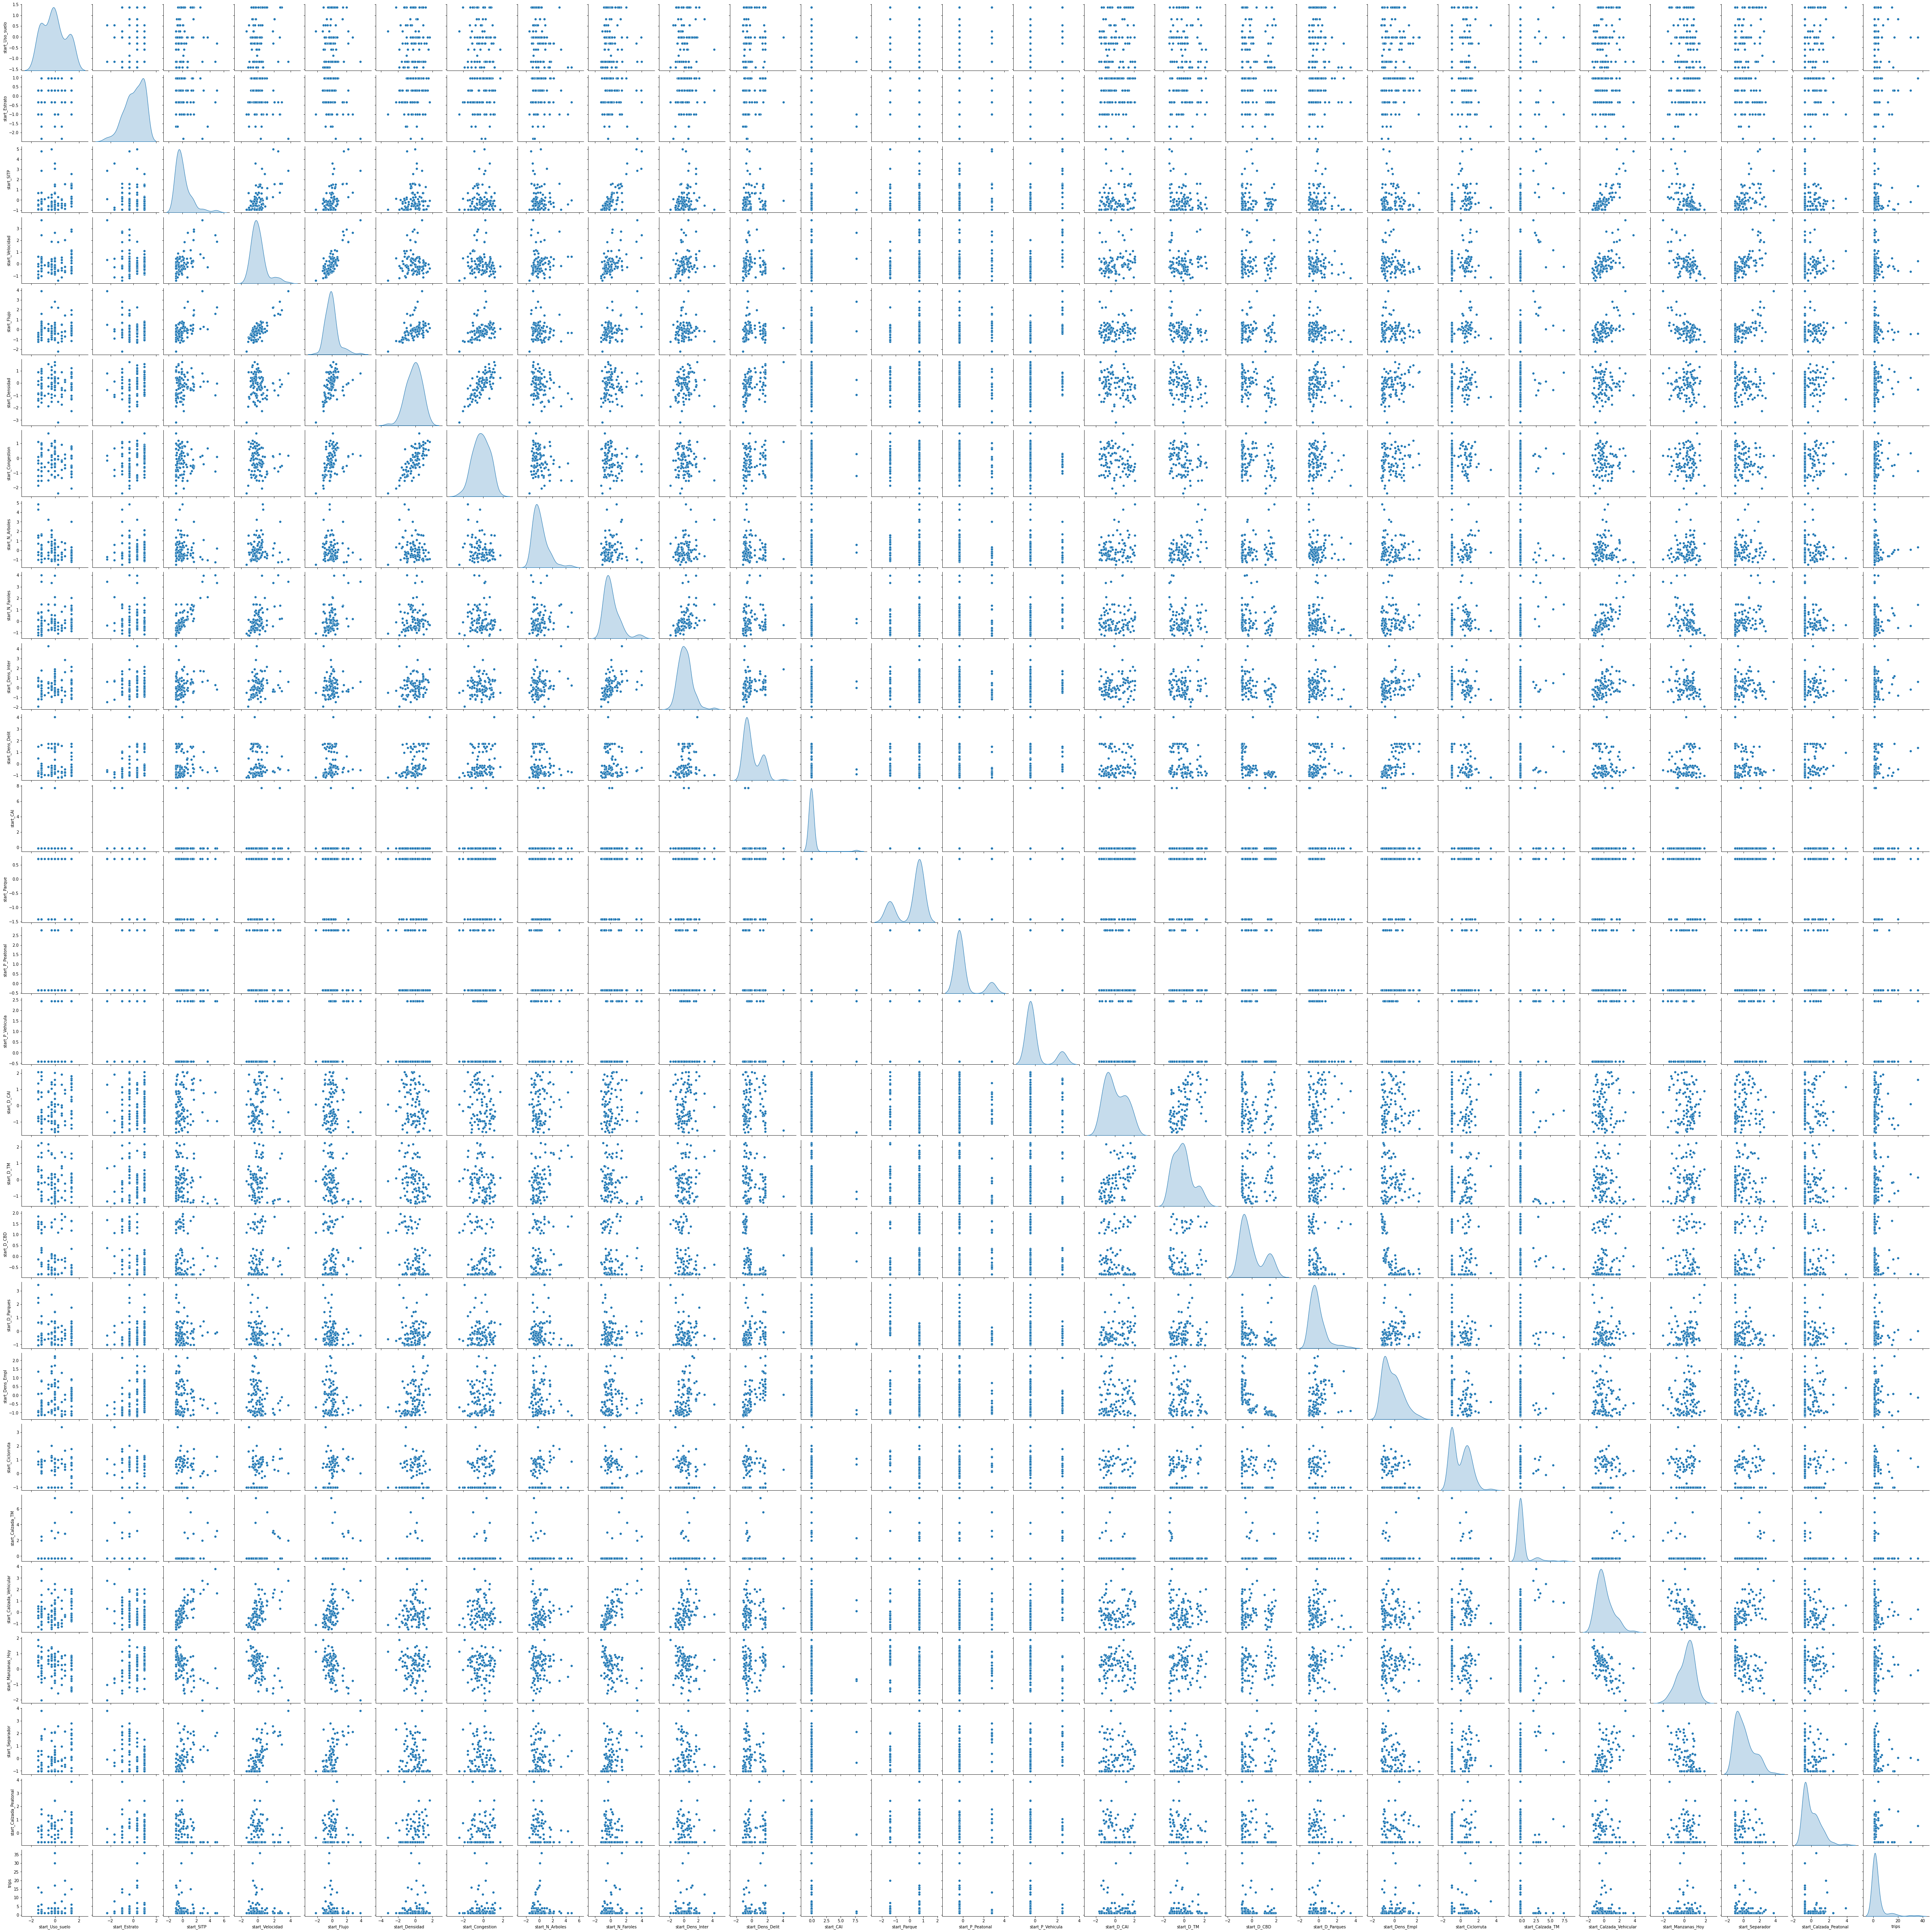

In [ ]:
sns_plot=sns.pairplot(normed_train_data[COLUMNAS[:26].tolist()+['trips']].sample(100), diag_kind="kde")
fig = sns_plot
fig.savefig("output2.svg")

In [ ]:
fig = sns_plot
fig.savefig("output.svg")

,loss,mae,root_mean_squared_error,val_loss,val_mae,val_root_mean_squared_error,epoch
25,136.953201,3.546676,11.702701,83.988121,3.458727,9.164503,25
26,136.953201,3.546676,11.702701,83.988121,3.458727,9.164503,26
27,136.953201,3.546676,11.702701,83.988121,3.458727,9.164503,27
28,136.953201,3.546676,11.702701,83.988121,3.458727,9.164503,28
29,136.953201,3.546676,11.702701,83.988121,3.458727,9.164503,29


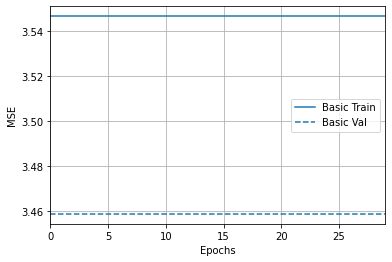

In [ ]:
#Estadisticos de validacion
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric ='mae')
plt.ylabel('MSE')
hist.tail()

In [ ]:
modelo.evaluate(normed_test_data, test_labels, batch_size=128)

257/257 [==============================] - 8s 29ms/step - loss: 122.1225 - mae: 3.4858 - root_mean_squared_error: 11.0509


[122.12251281738281, 3.4858205318450928, 11.050905227661133]